In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r"E:\2022-2023 hk1\PTTK\CK\code\1-12-2017 1-12-2022\VND Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,16511.9,16477.2,16615.9,16338.4,1060000.0,0.01
1,12/4/2017,16997.5,16720.0,17309.7,16615.9,1600000.0,0.03
2,12/5/2017,16303.7,16997.5,16997.5,16303.7,2360000.0,-0.04
3,12/6/2017,16234.4,16234.4,16373.1,15748.7,2620000.0,0.00
4,12/7/2017,15818.1,16303.7,16338.4,15679.3,1070000.0,-0.03
...,...,...,...,...,...,...,...
1238,11/25/2022,11250.0,10850.0,11250.0,10700.0,23100000.0,0.07
1239,11/28/2022,12000.0,11700.0,12000.0,11600.0,34140000.0,0.07
1240,11/29/2022,12800.0,12400.0,12800.0,12050.0,47920000.0,0.07
1241,11/30/2022,13600.0,13000.0,13600.0,12550.0,36160000.0,0.06


In [3]:
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

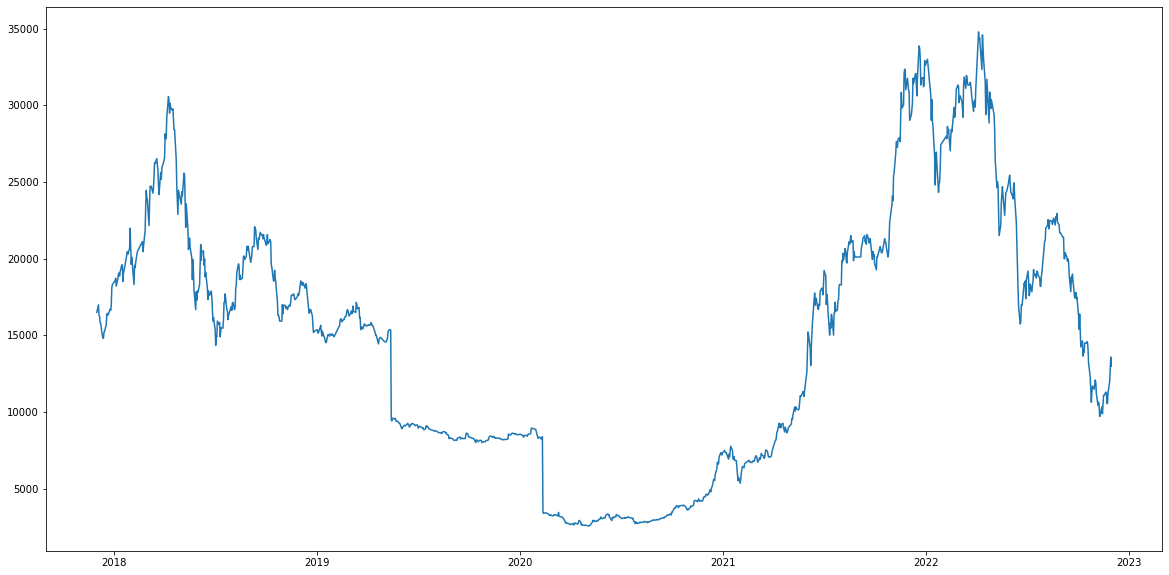

In [4]:
plt.figure(figsize=(20,10))
plt.plot(df['Price'])
plt.show()

In [5]:
# Set the index of the DataFrame to the 'date' column
df.index = df.Date
df = pd.DataFrame(df, columns=['Price'])



In [6]:
import math
data = df.values
t = math.ceil(len(df)* 0.7)
train_data = data[:t]
test_data = data[t:]

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.43264517],
       [0.44772296],
       [0.42618059],
       ...,
       [0.31739132],
       [0.34223118],
       [0.32360128]])

In [8]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (811, 60, 1).
y_train shape == (811, 1).


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf

learning_rate = 0.0001
hidden_unit = 64
batch_size = 32
epoch = 100
model = Sequential()
model.add(LSTM(units=hidden_unit, return_sequences=True, input_shape =(x_train.shape[1],1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=True,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='mean_squared_error')
pred = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epoch)

Epoch 1/100
26/26 [==============================] - 46s 97ms/step - loss: 0.1015
Epoch 2/100
26/26 [==============================] - 2s 96ms/step - loss: 0.0779
Epoch 3/100
26/26 [==============================] - 3s 101ms/step - loss: 0.0417
Epoch 4/100
26/26 [==============================] - 2s 91ms/step - loss: 0.0153
Epoch 5/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0094
Epoch 6/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0066
Epoch 7/100
26/26 [==============================] - 3s 106ms/step - loss: 0.0057
Epoch 8/100
26/26 [==============================] - 2s 92ms/step - loss: 0.0049
Epoch 9/100
26/26 [==============================] - 2s 96ms/step - loss: 0.0057
Epoch 10/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0050
Epoch 11/100
26/26 [==============================] - 3s 107ms/step - loss: 0.0048
Epoch 12/100
26/26 [==============================] - 2s 95ms/step - loss: 0.0045
Epoch 13/100
26/26 [

In [10]:
y_train = sc.inverse_transform(y_train)

y_train_predict = model.predict(x_train)

y_train_predict = sc.inverse_transform(y_train_predict)

26/26 [==============================] - 1s 14ms/step


In [11]:
test = df[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
    x_test.append(sc_test[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data[t:]

print('x_test shape == {}.'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

x_test shape == (372, 60, 1).
y_test shape == (372, 1).


In [12]:
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

12/12 [==============================] - 0s 17ms/step


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1649.10
MAPE: 7.41%
MSE: 4482011.89
RMSE: 2117.08
R2: 0.89


C:\Users\PC\AppData\Local\Temp\ipykernel_28048\2204084320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


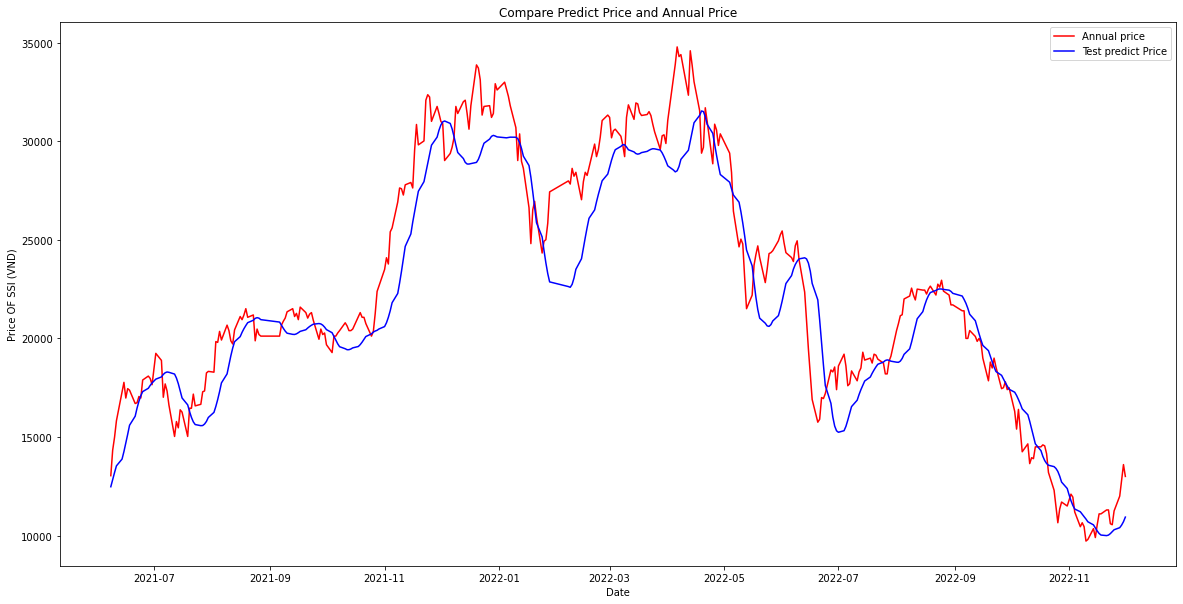

In [14]:
test_data1 = df[t:]
plt.figure(figsize=(20,10))
plt.plot(df[t:], label='Annual price', color='r')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('Date')
plt.ylabel('Price OF SSI (VND)')
plt.legend()
plt.show()

In [15]:
predictions_future = model.predict(x_test[-30:])

1/1 [==============================] - 0s 26ms/step


In [16]:
predictions_future

array([[0.34122068],
       [0.33902085],
       [0.33615267],
       [0.33143497],
       [0.3239993 ],
       [0.31466442],
       [0.30459812],
       [0.29456592],
       [0.2854287 ],
       [0.277929  ],
       [0.27227795],
       [0.26792094],
       [0.26397297],
       [0.26022378],
       [0.25648415],
       [0.25217578],
       [0.24730259],
       [0.24247077],
       [0.2377617 ],
       [0.23379302],
       [0.2312611 ],
       [0.23037776],
       [0.23120853],
       [0.23354769],
       [0.23654276],
       [0.23960388],
       [0.24288264],
       [0.24689582],
       [0.25226855],
       [0.25954485]], dtype=float32)

In [17]:
predict = sc.inverse_transform(predictions_future)
predict

array([[13567.455 ],
       [13496.607 ],
       [13404.233 ],
       [13252.294 ],
       [13012.818 ],
       [12712.177 ],
       [12387.979 ],
       [12064.878 ],
       [11770.603 ],
       [11529.064 ],
       [11347.065 ],
       [11206.742 ],
       [11079.593 ],
       [10958.845 ],
       [10838.405 ],
       [10699.648 ],
       [10542.701 ],
       [10387.086 ],
       [10235.425 ],
       [10107.608 ],
       [10026.064 ],
       [ 9997.615 ],
       [10024.371 ],
       [10099.707 ],
       [10196.167 ],
       [10294.754 ],
       [10400.351 ],
       [10529.601 ],
       [10702.637 ],
       [10936.9795]], dtype=float32)

In [18]:
predict.shape

(30, 1)

In [19]:
datelist_future = pd.date_range(start="12/2/2022",end="12/31/2022")

In [20]:
new_date=df.index.append(datelist_future)
new_date

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1273, freq=None)

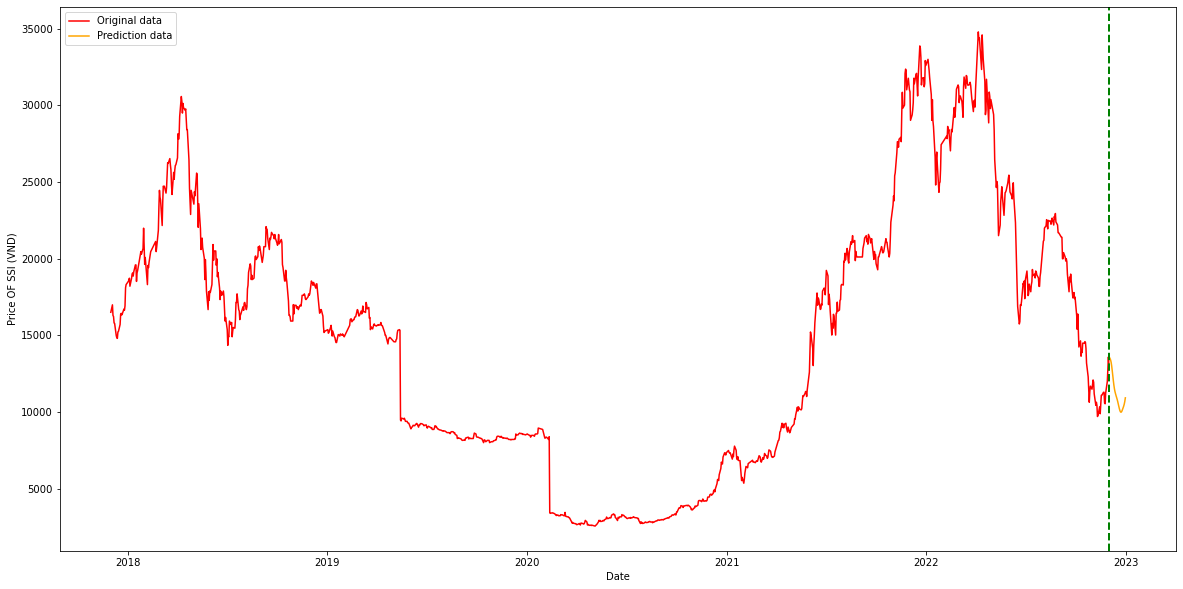

In [21]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df.index, df['Price'], 'red', label="Original data")
plt.plot(datelist_future, predict, 'orange', label="Prediction data")
plt.axvline(x = min(datelist_future), color='green', linewidth=2, linestyle='--')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price OF VND (VND)')
plt.show()